In [51]:
import os
import re
import glob
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

In [47]:
name = "Pom"
mode = "Wav"
# mode = "AI"

In [48]:
inputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/{} voice (16000)/{}.wav (trimmed)/".format(mode,name)
# inputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/{} voice (16000)/{} Trimmed/".format(mode,name)
# inputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/{} voice (16000)/{} 22500 trimmed/".format(mode,name)

if os.path.exists(inputPath):
    print(f"The directory '{inputPath}' exists.")
else:
    print(f"The directory '{inputPath}' does not exist.")

audioClips = [os.path.basename(x) for x in glob.glob(os.path.join(inputPath, "*.wav"))]

print("Number of .wav files in audio folder = ", len(audioClips))

The directory 'C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Wav voice (16000)/Pom.wav (trimmed)/' exists.
Number of .wav files in audio folder =  50


In [49]:
def sortFileName(filename):
    return [int(s) if s.isdigit() else s for s in re.split(r"(\d+)", filename)]


audioClips = sorted(audioClips, key=sortFileName)
print(audioClips)

['Pom 1.wav', 'Pom 2.wav', 'Pom 3.wav', 'Pom 4.wav', 'Pom 5.wav', 'Pom 6.wav', 'Pom 7.wav', 'Pom 8.wav', 'Pom 9.wav', 'Pom 10.wav', 'Pom 11.wav', 'Pom 12.wav', 'Pom 13.wav', 'Pom 14.wav', 'Pom 15.wav', 'Pom 16.wav', 'Pom 17.wav', 'Pom 18.wav', 'Pom 19.wav', 'Pom 20.wav', 'Pom 21.wav', 'Pom 22.wav', 'Pom 23.wav', 'Pom 24.wav', 'Pom 25.wav', 'Pom 26.wav', 'Pom 27.wav', 'Pom 28.wav', 'Pom 29.wav', 'Pom 30.wav', 'Pom 31.wav', 'Pom 32.wav', 'Pom 33.wav', 'Pom 34.wav', 'Pom 35.wav', 'Pom 36.wav', 'Pom 37.wav', 'Pom 38.wav', 'Pom 39.wav', 'Pom 40.wav', 'Pom 41.wav', 'Pom 42.wav', 'Pom 43.wav', 'Pom 44.wav', 'Pom 45.wav', 'Pom 46.wav', 'Pom 47.wav', 'Pom 48.wav', 'Pom 49.wav', 'Pom 50.wav']


KeyboardInterrupt: 

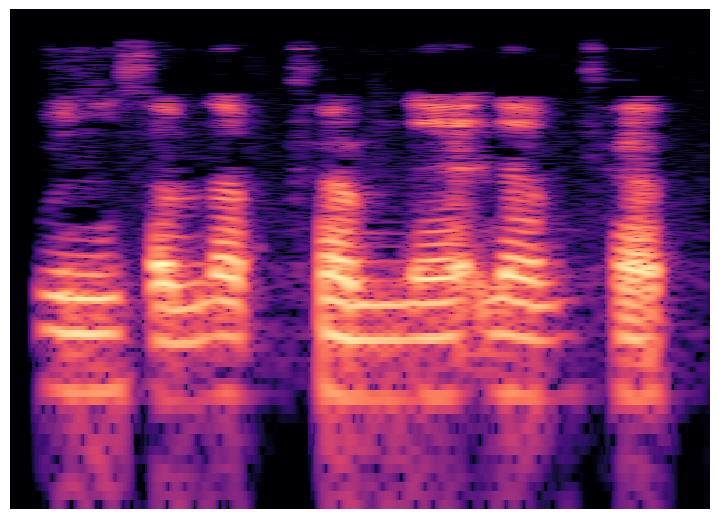

In [50]:
outputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human Picture Ver.3/{}/".format(name)
# outputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/{} Picture Ver.3/{}/".format(mode,name)

for i in range(len(audioClips)):
    if len(audioClips) > 0:
        audioPath = os.path.join(inputPath, audioClips[i])

        x, sr = librosa.load(audioPath)

        # Adaptive hop_length and n_fft for varying signal lengths
        hop_length = int(len(x) / 500)
        n_fft = int(len(x) / 20)

        # Extract frequency bands of interest
        bins_per_octave = 24
        n_bins = 24 * bins_per_octave

        X = librosa.stft(x, hop_length=hop_length, n_fft=n_fft)
        Xdb = librosa.amplitude_to_db(abs(X))

        # Create the spectrogram plot
        fig, ax = plt.subplots(figsize=(7, 5))  # Adjust figure size as needed

        chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length, n_fft=n_fft)
        librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="log", cmap="magma", ax=ax)

        # Tightly crop the plot with margins
        ax.margins(0.1)  # Adjust margin value if needed

        # Save the image without whitespace
        filename = os.path.splitext(os.path.basename(audioPath))[0] + ".png"
        plt.axis("off")  # Remove axes labels and ticks
        plt.tight_layout(pad=0)
        plt.savefig(os.path.join(outputPath, filename), bbox_inches="tight", pad_inches=0)

        # Close the figure
        plt.close(fig)

In [ ]:
# outputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/{} Picture Ver.3/{}/".format(mode,name)

# for i in range(len(audioClips)):
#     if len(audioClips) > 0:
#         audioPath = os.path.join(inputPath, audioClips[i])
#         x, sr = librosa.load(audioPath)

#         # Spectrogram Ver3
#         hop_length = 128 # smaller values for higher resolution
#         n_fft = 4096
        
#         # Spectrogram Ver2
#         # hop_length = int(len(x) / 500) 
#         # n_fft = int(len(x) / 20)

#         bins_per_octave = 24
#         n_bins = 24 * bins_per_octave

#         S = librosa.stft(x, hop_length = hop_length, n_fft = n_fft)
#         S_dB = librosa.amplitude_to_db(abs(S), ref=np.max)

#         fig, ax = plt.subplots()
#         img = librosa.display.specshow(S_dB, ax=ax, y_axis='linear')
#         ax.axis('off')

#         # Save the image without any extra whitespace
#         plt.tight_layout(pad=0)
#         filename = os.path.splitext(os.path.basename(audioPath))[0] + ".png"  # Extract filename without extension
#         outputFile = os.path.join(outputPath, filename)

#         plt.savefig(outputFile, bbox_inches='tight', pad_inches=0)
#         plt.close(fig)  # Close the plot to avoid memory issues

In [ ]:
def audio_to_spectrogram(audio_path, output_folder):
    """
    Convert an audio file into a spectrogram image and save it.

    Parameters:
    - audio_path: Path to the input audio file.
    - output_folder: Folder where the spectrogram images will be saved.
    """
    # Load the audio file. Limit to the first 2 seconds (sr * duration)
    y, sr = librosa.load(audio_path, sr=None, duration=2.0)
    
    # Generate a Mel-scaled spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    
    # Convert the Mel-scaled spectrogram (power) to decibels (log power)
    S_DB = librosa.power_to_db(S, ref=np.max)
    
    # Plotting the spectrogram and removing the axis
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.axis('off')  # Removes the axis to have only the spectrogram
    
    # Construct the output filename from the audio filename
    base_filename = os.path.splitext(os.path.basename(audio_path))[0]
    output_filename = f"{base_filename}.png"
    output_path = os.path.join(output_folder, output_filename)
    
    # Save the figure
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

In [ ]:
AIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/AI augment voice"
HumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human augment voice"

In [ ]:
AIPath = [os.path.basename(x) for x in glob.glob(os.path.join(AIDir, "*.wav"))]
print("Number of files in AI path :", len(AIPath))
HumanPath = [os.path.basename(x) for x in glob.glob(os.path.join(HumanDir, "*.wav"))]
print("Number of files in Human path :", len(HumanPath))


Number of files in AI path : 2000
Number of files in Human path : 2000


In [ ]:
for filename in os.listdir(AIDir):
    if filename.endswith(".wav"):
        fullPath = os.path.join(AIDir, filename)

In [ ]:
# Example usage
AIFiles = ['/mnt/data/Ava 1.wav', '/mnt/data/Bright 1.wav']
output_folder = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/AI Picture Ver.4"

os.makedirs(output_folder, exist_ok=True)